# Paysage de fitness

sur Graph Coloring Problem et Weighted Vertex Coloring Problem sur l'instance DSJC500.5.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_theme()


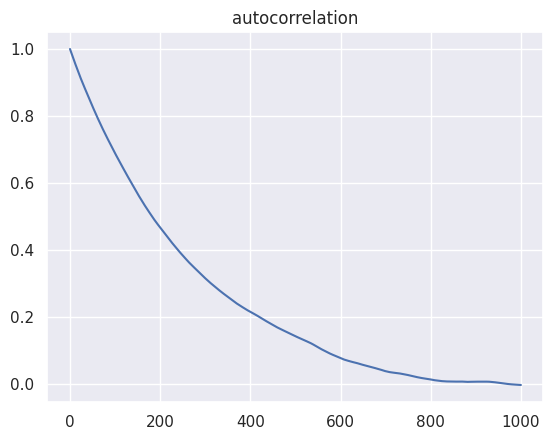

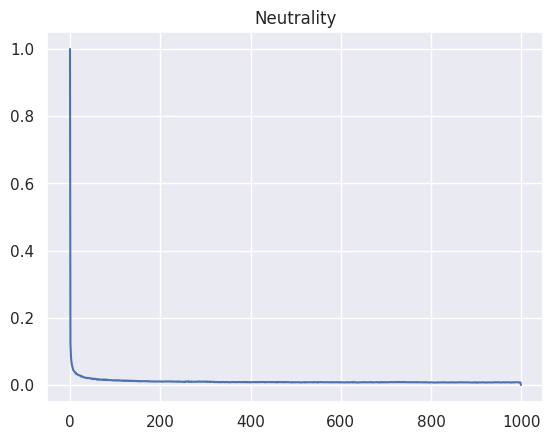

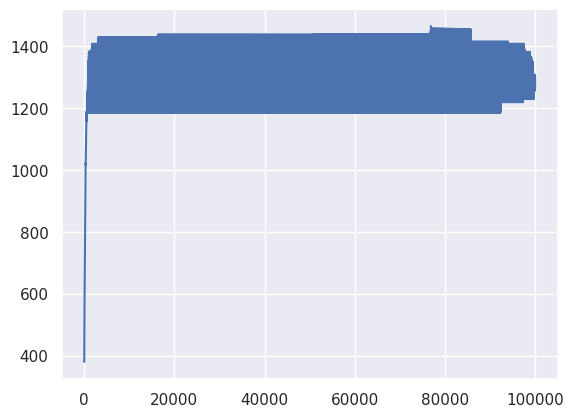

In [3]:
data = pd.read_csv("random_walk_DSJC500.5_47_from_random")[
    [
        "score",
    ]
]
x = data["score"].to_numpy()[100::]

nlags = 1000
acorr = sm.tsa.acf(x, nlags = nlags)

plt.plot(acorr)
plt.title("autocorrelation")
plt.show()

neutrality = [0] * nlags

for k in range(nlags-1):
    n = 1
    if (k > 0):
        tmp = [x[i] == x[i + k] for i in range(len(x) - k)]
        n = sum(tmp)/(len(x)-k)
    neutrality[k] = n

plt.plot(neutrality)
plt.title("Neutrality")
plt.show()

data = data.sort_values(by=["score"])

plt.plot(data["score"])

## WVCP

Le score représente la somme des sommets le plus lourd pour chaque couleur.

La recherche locale est un tabou travaillant dans l'espace légal avec un opérateur one-move (les moves menant à des solutions illégales ne sont pas pris en compte).

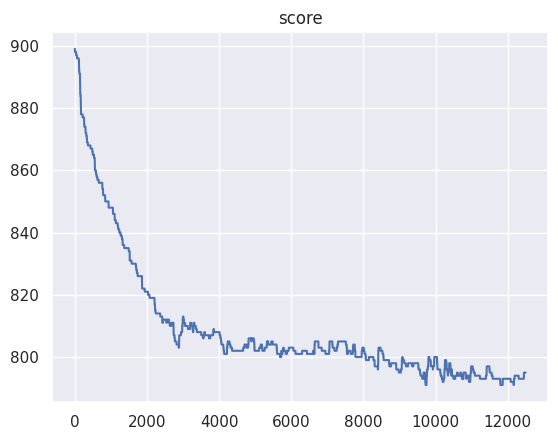

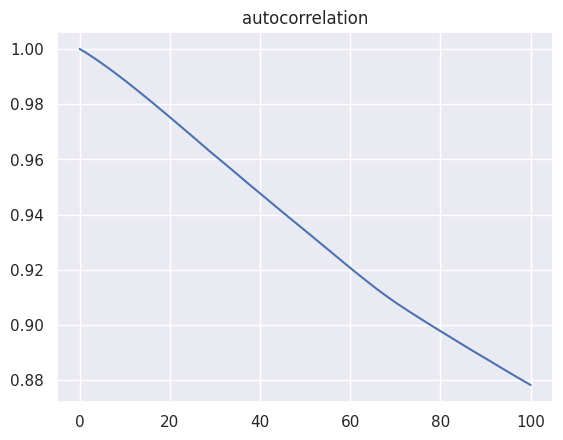

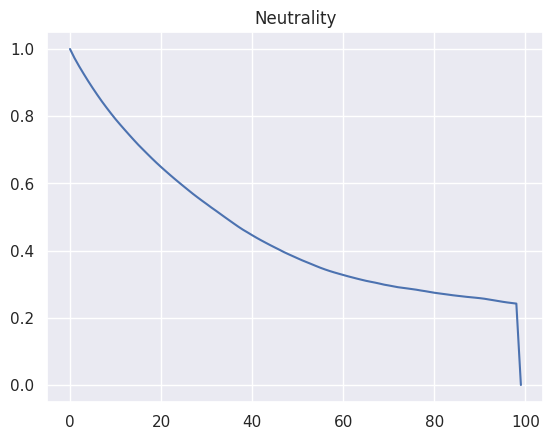

data['%regress'].max() =96.77%
data['%regress'].mean()=94.14%
data['%regress'].std() =1.84%
data['%regress'].min() =84.82%

data['%neutral'].max() =15.18%
data['%neutral'].mean()=5.84%
data['%neutral'].std() =1.85%
data['%neutral'].min() =3.13%

data['%improve'].max() =0.59%
data['%improve'].mean()=0.03%
data['%improve'].std() =0.06%
data['%improve'].min() =0.00%


In [4]:
data = pd.read_csv("neighbors_DSJC500.5_wvcp.csv")[
    [
        "score",
        "%regress",
        "%neutral",
        "%improve",
    ]
]

plt.plot(data["score"])
plt.title("score")
plt.show()
x = data["score"].to_numpy()[2000::]

nlags = 100
acorr = sm.tsa.acf(x, nlags = nlags)

plt.plot(acorr)
plt.title("autocorrelation")
plt.show()

neutrality = [0] * nlags

for k in range(nlags-1):
    n = 1
    if (k > 0):
        tmp = [x[i] == x[i + k] for i in range(len(x) - k)]
        n = sum(tmp)/(len(x)-k)
    neutrality[k] = n

plt.plot(neutrality)
plt.title("Neutrality")
plt.show()

data = data.sort_values(by=["score"])

print(f"{data['%regress'].max() =:.2%}")
print(f"{data['%regress'].mean()=:.2%}")
print(f"{data['%regress'].std() =:.2%}")
print(f"{data['%regress'].min() =:.2%}")
print()
print(f"{data['%neutral'].max() =:.2%}")
print(f"{data['%neutral'].mean()=:.2%}")
print(f"{data['%neutral'].std() =:.2%}")
print(f"{data['%neutral'].min() =:.2%}")
print()
print(f"{data['%improve'].max() =:.2%}")
print(f"{data['%improve'].mean()=:.2%}")
print(f"{data['%improve'].std() =:.2%}")
print(f"{data['%improve'].min() =:.2%}")


<Axes: xlabel='score'>

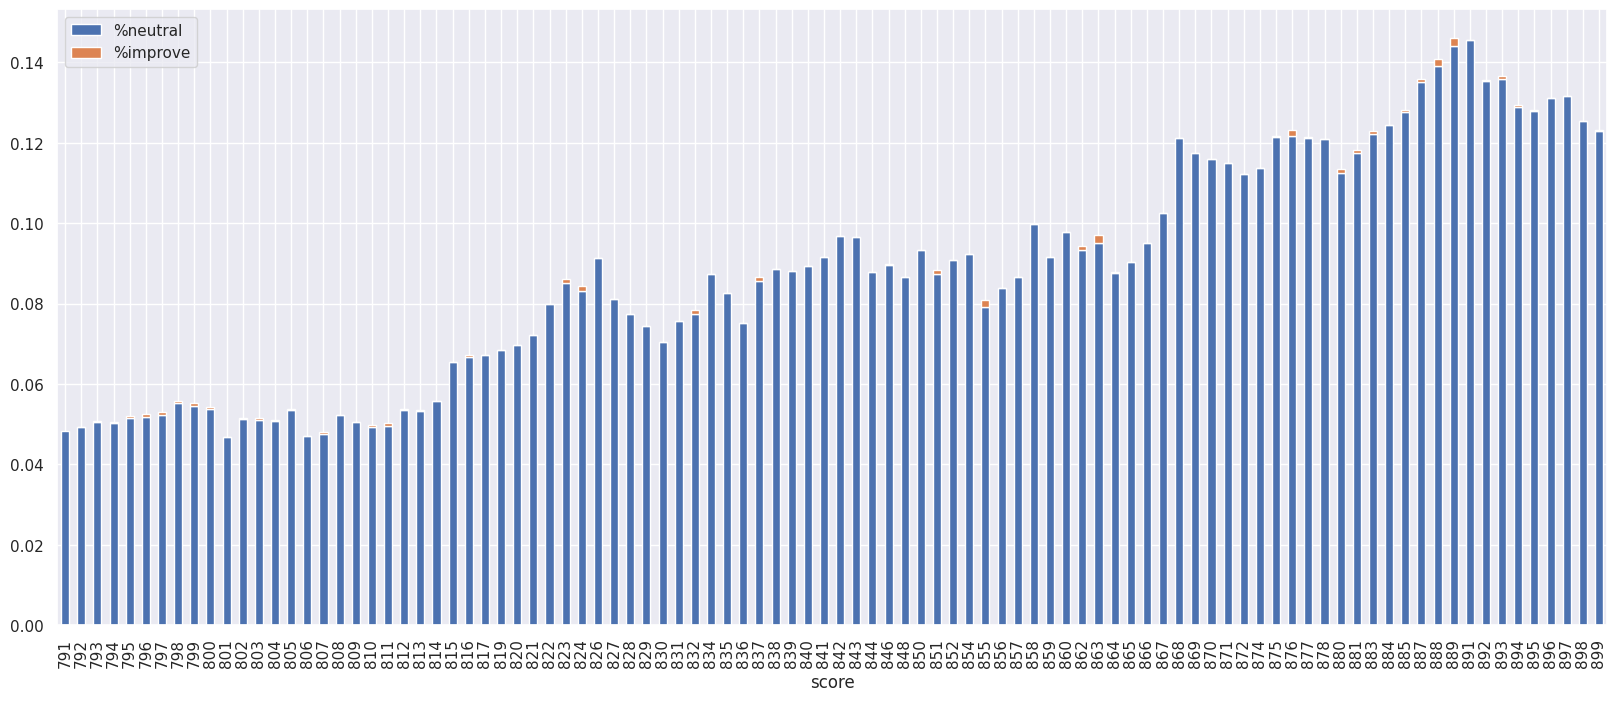

In [5]:
data.groupby("score").mean().plot(
    kind="bar",
    y=["%neutral", "%improve"],
    stacked=True,
    figsize=(20, 8),
)
# coefficient correlation paysages (chercher thèse de Sara ou Vincent ) entre deux vecteurs puis décalage 2 par deux sur une random walk

<Axes: title={'center': 'Histogram of scores'}, ylabel='Frequency'>

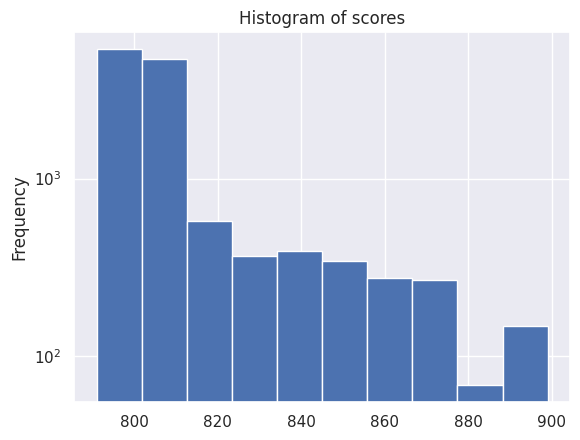

In [6]:
data["score"].plot(
    kind="hist",
    title="Histogram of scores",
    logy=True,
)


Le % de neutre est très variable (après c'est sur un seul run) mais à tendance à diminuer.

Le % d'améliorant semble très faible, il y a l'air d'en avoir un peu plus vers 795-801 mais ça doit être dû au fait que la LS à passé beaucoup plus de temps à tourner dans cette zone et à mieux échantillonné.

# GCP

Le score correspond au nombre de sommets en conflits.

La recherche locale est un TabuCol (one-move, illégal).

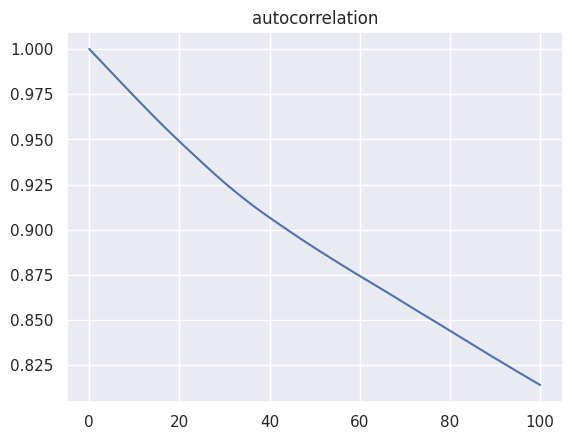

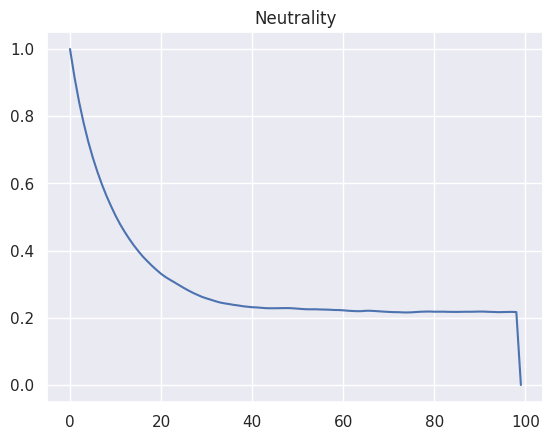

data['%regress'].max() =99.51%
data['%regress'].mean()=99.44%
data['%regress'].std() =0.34%
data['%regress'].min() =87.17%

data['%neutral'].max() =7.66%
data['%neutral'].mean()=0.52%
data['%neutral'].std() =0.23%
data['%neutral'].min() =0.47%

data['%improve'].max() =5.17%
data['%improve'].mean()=0.04%
data['%improve'].std() =0.12%
data['%improve'].min() =0.02%


In [7]:
data = pd.read_csv("neighbors_DSJC500.5_gcp.csv")[
    [
        "score",
        "%regress",
        "%neutral",
        "%improve",
    ]
]
x = data["score"].to_numpy()[100::]

nlags = 100
acorr = sm.tsa.acf(x, nlags = nlags)

plt.plot(acorr)
plt.title("autocorrelation")
plt.show()

neutrality = [0] * nlags

for k in range(nlags-1):
    n = 1
    if (k > 0):
        tmp = [x[i] == x[i + k] for i in range(len(x) - k)]
        n = sum(tmp)/(len(x)-k)
    neutrality[k] = n

plt.plot(neutrality)
plt.title("Neutrality")
plt.show()

data = data.sort_values(by=["score"])
print(f"{data['%regress'].max() =:.2%}")
print(f"{data['%regress'].mean()=:.2%}")
print(f"{data['%regress'].std() =:.2%}")
print(f"{data['%regress'].min() =:.2%}")
print()
print(f"{data['%neutral'].max() =:.2%}")
print(f"{data['%neutral'].mean()=:.2%}")
print(f"{data['%neutral'].std() =:.2%}")
print(f"{data['%neutral'].min() =:.2%}")
print()
print(f"{data['%improve'].max() =:.2%}")
print(f"{data['%improve'].mean()=:.2%}")
print(f"{data['%improve'].std() =:.2%}")
print(f"{data['%improve'].min() =:.2%}")


<Axes: xlabel='score'>

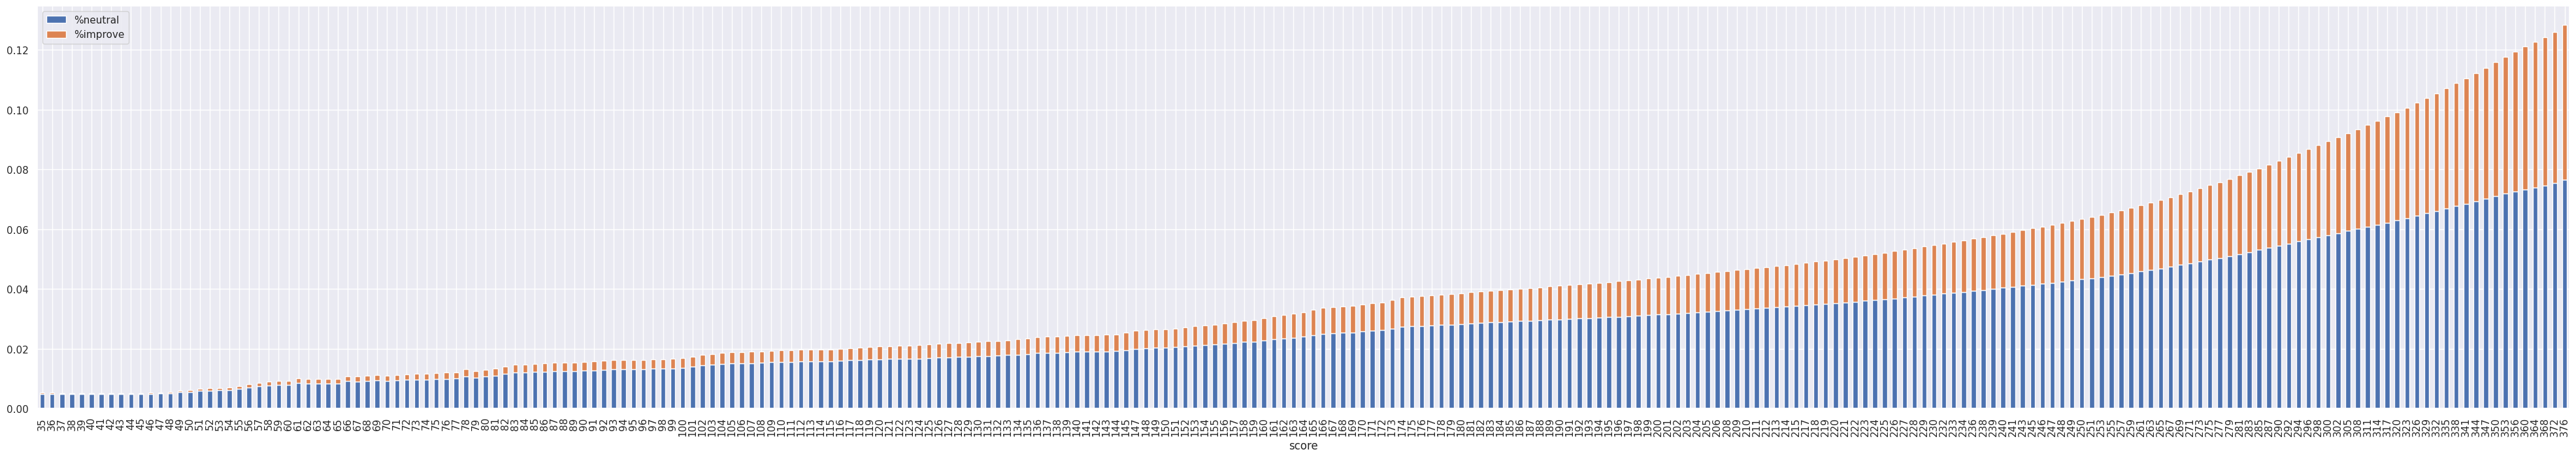

In [8]:
data.groupby("score").mean().plot(
    kind="bar",
    y=["%neutral", "%improve"],
    stacked=True,
    figsize=(50, 8),
)


<Axes: title={'center': 'Histogram of scores'}, ylabel='Frequency'>

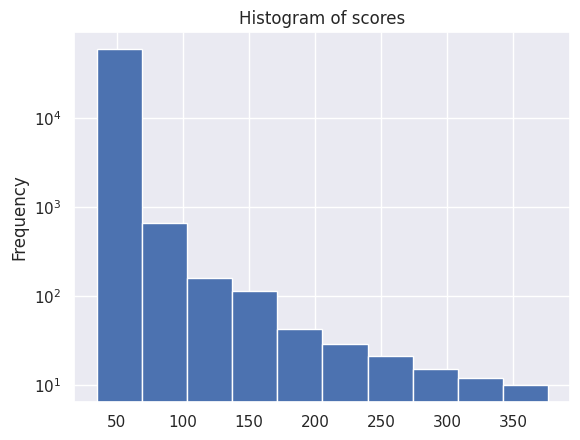

In [9]:
data["score"].plot(
    kind="hist",
    title="Histogram of scores",
    logy=True,
)


L'espace de recherche semble beaucoup plus lisse que pour le WVCP. Le % de neutres et d'améliorants décroît lorsque le score diminue.

# WVCP random walk

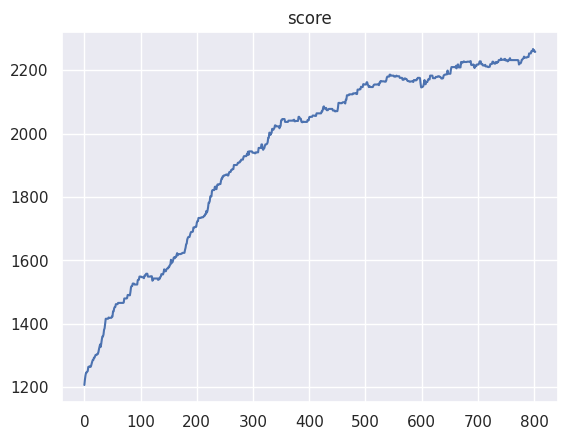

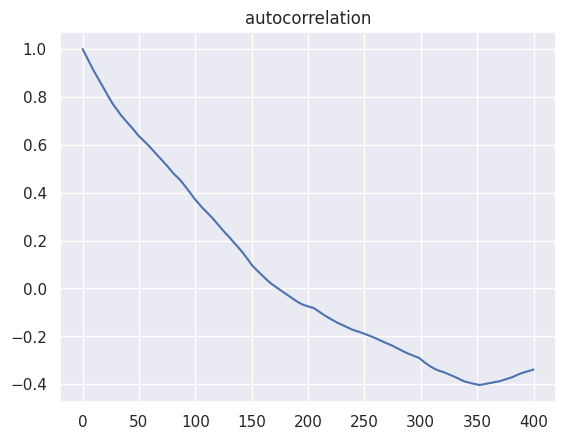

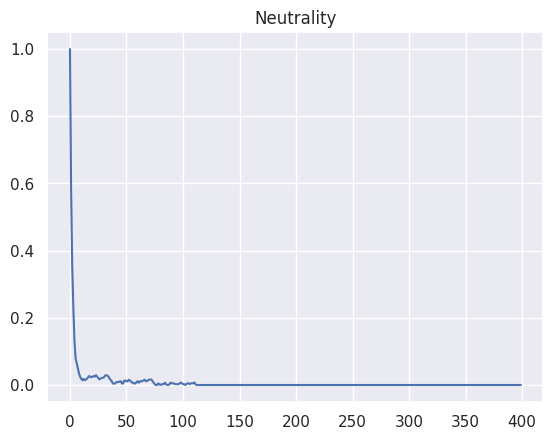

data['%regress'].max() =74.11%
data['%regress'].mean()=32.66%
data['%regress'].std() =10.65%
data['%regress'].min() =22.59%

data['%neutral'].max() =61.57%
data['%neutral'].mean()=53.45%
data['%neutral'].std() =6.67%
data['%neutral'].min() =24.24%

data['%improve'].max() =18.56%
data['%improve'].mean()=13.89%
data['%improve'].std() =4.26%
data['%improve'].min() =1.65%


In [10]:
data = pd.read_csv("random_walk_DSJC500.5_wvcp.csv")[
    [
        "score",
        "%regress",
        "%neutral",
        "%improve",
    ]
]
plt.plot(data["score"])
plt.title("score")
plt.show()
x = data["score"].to_numpy()[300::]

nlags = 400
acorr = sm.tsa.acf(x, nlags = nlags)

plt.plot(acorr)
plt.title("autocorrelation")
plt.show()

neutrality = [0] * nlags

for k in range(nlags-1):
    n = 1
    if (k > 0):
        tmp = [x[i] == x[i + k] for i in range(len(x) - k)]
        n = sum(tmp)/(len(x)-k)
    neutrality[k] = n

plt.plot(neutrality)
plt.title("Neutrality")
plt.show()

data = data.sort_values(by=["score"])

print(f"{data['%regress'].max() =:.2%}")
print(f"{data['%regress'].mean()=:.2%}")
print(f"{data['%regress'].std() =:.2%}")
print(f"{data['%regress'].min() =:.2%}")
print()
print(f"{data['%neutral'].max() =:.2%}")
print(f"{data['%neutral'].mean()=:.2%}")
print(f"{data['%neutral'].std() =:.2%}")
print(f"{data['%neutral'].min() =:.2%}")
print()
print(f"{data['%improve'].max() =:.2%}")
print(f"{data['%improve'].mean()=:.2%}")
print(f"{data['%improve'].std() =:.2%}")
print(f"{data['%improve'].min() =:.2%}")


<Axes: xlabel='score'>

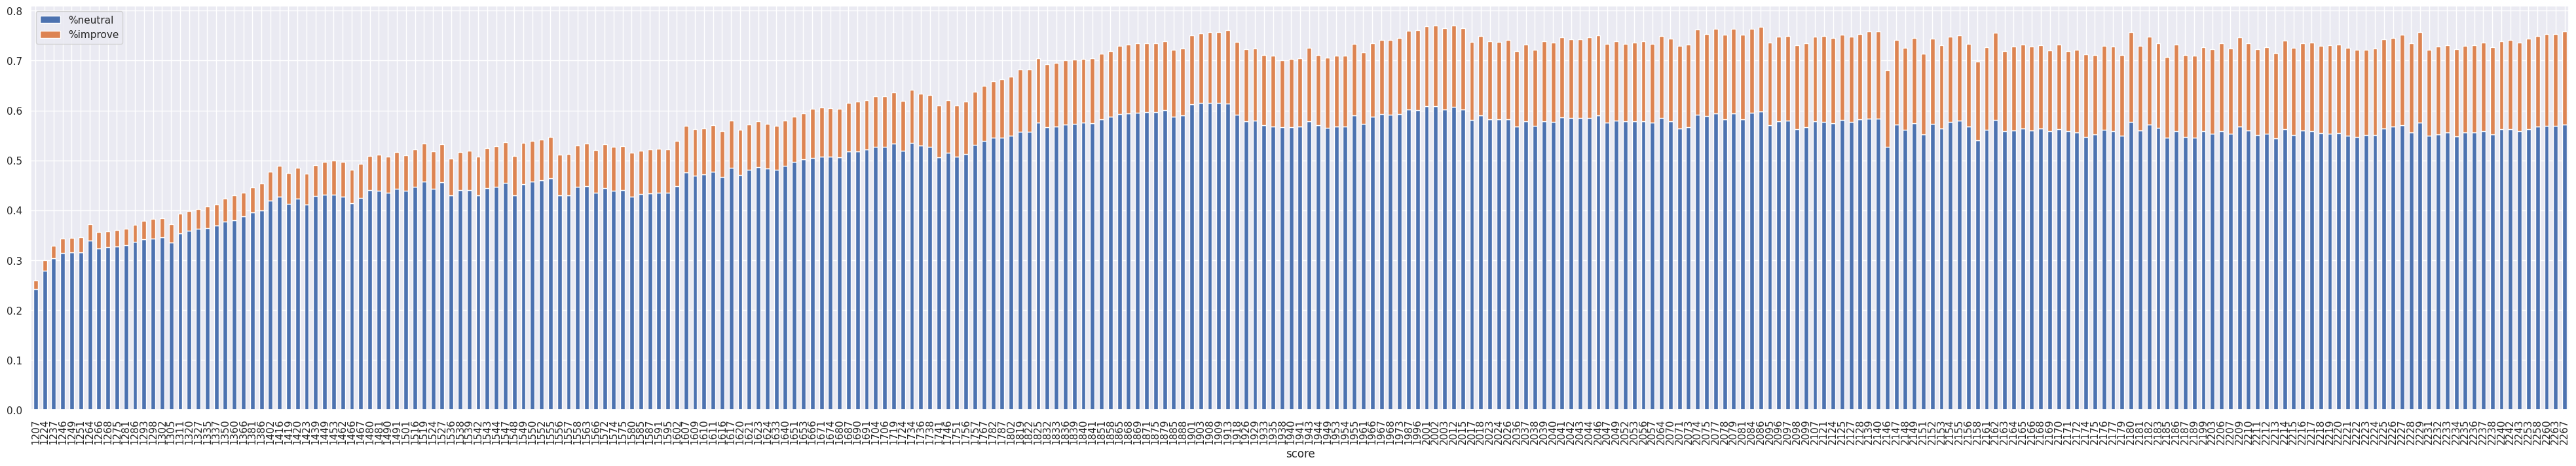

In [11]:
data.groupby("score").mean().plot(
    kind="bar",
    y=["%neutral", "%improve"],
    stacked=True,
    figsize=(50, 8),
)


# GCP random walk

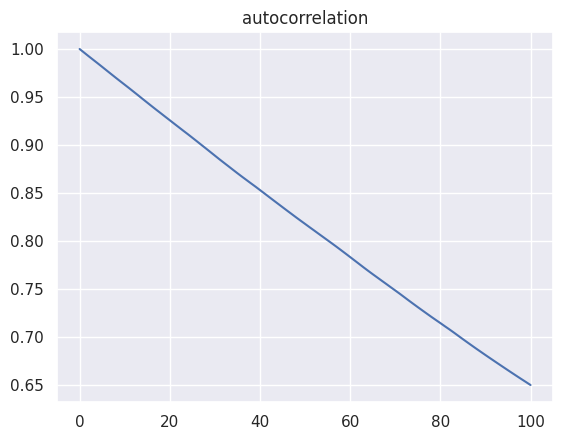

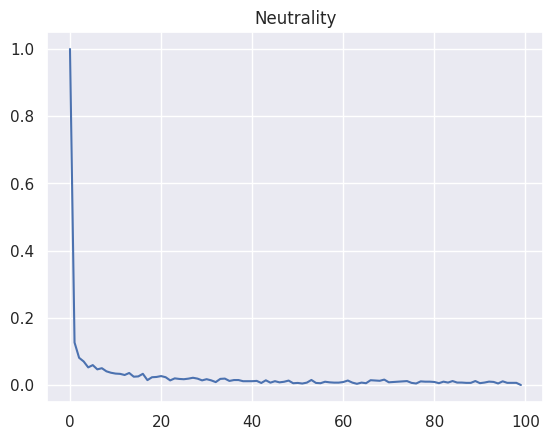

data['%regress'].max() =89.08%
data['%regress'].mean()=63.58%
data['%regress'].std() =9.81%
data['%regress'].min() =52.39%

data['%neutral'].max() =12.56%
data['%neutral'].mean()=11.08%
data['%neutral'].std() =1.56%
data['%neutral'].min() =6.46%

data['%improve'].max() =35.04%
data['%improve'].mean()=25.34%
data['%improve'].std() =8.28%
data['%improve'].min() =4.46%


In [12]:
data = pd.read_csv("random_walk_DSJC500.5_gcp.csv")[
    [
        "score",
        "%regress",
        "%neutral",
        "%improve",
    ]
]
x = data["score"].to_numpy()[100::]

nlags = 100
acorr = sm.tsa.acf(x, nlags = nlags)

plt.plot(acorr)
plt.title("autocorrelation")
plt.show()

neutrality = [0] * nlags

for k in range(nlags-1):
    n = 1
    if (k > 0):
        tmp = [x[i] == x[i + k] for i in range(len(x) - k)]
        n = sum(tmp)/(len(x)-k)
    neutrality[k] = n

plt.plot(neutrality)
plt.title("Neutrality")
plt.show()

data = data.sort_values(by=["score"])

print(f"{data['%regress'].max() =:.2%}")
print(f"{data['%regress'].mean()=:.2%}")
print(f"{data['%regress'].std() =:.2%}")
print(f"{data['%regress'].min() =:.2%}")
print()
print(f"{data['%neutral'].max() =:.2%}")
print(f"{data['%neutral'].mean()=:.2%}")
print(f"{data['%neutral'].std() =:.2%}")
print(f"{data['%neutral'].min() =:.2%}")
print()
print(f"{data['%improve'].max() =:.2%}")
print(f"{data['%improve'].mean()=:.2%}")
print(f"{data['%improve'].std() =:.2%}")
print(f"{data['%improve'].min() =:.2%}")


<Axes: xlabel='score'>

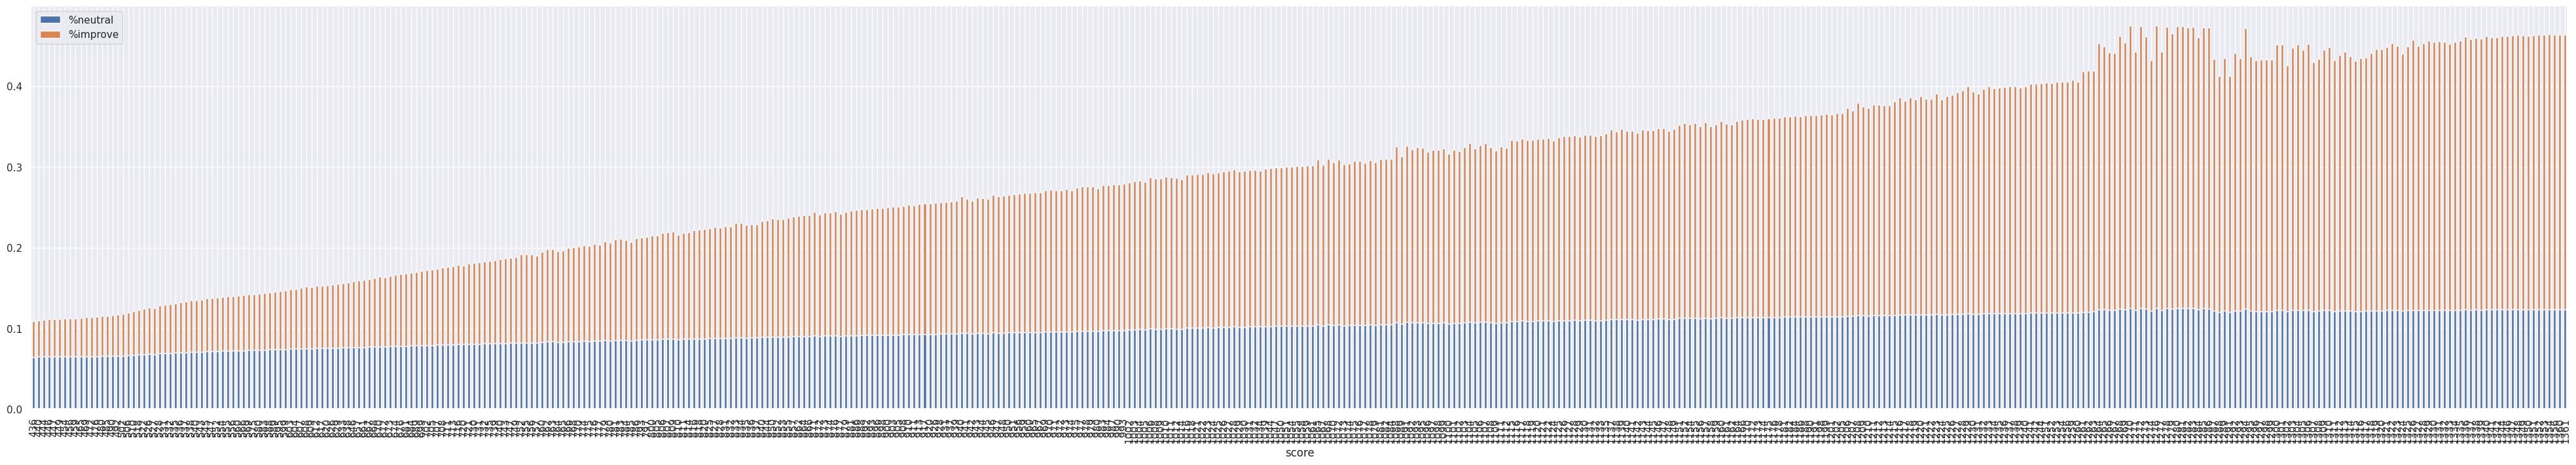

In [13]:
data.groupby("score").mean().plot(
    kind="bar",
    y=["%neutral", "%improve"],
    stacked=True,
    figsize=(50, 8),
)


A tester pour :
- $s_{i+1} \in N(s_i)$ en partant d'une solution totalement aléatoire
- $s_{i+1} \in N_{tabu\_search}(s_i)$ en partant d'une solution de très bonne qualité

X = 1_000_000_000

| #it 	| fit   	| sol   	|
|-----	|-------	|-------	|
| $i$ 	| $f_i$ 	| $s_i$ 	|
| ... 	| ...   	| ...   	|
| $X$ 	| $f_x$ 	| $s_X$ 	|

K=20 ~ 100

3 mesures pour (1) et (2) :
- autocorrélation : $autocorrelation([f_i | i \in {1...X-K}], [f_i | i \in K+1...X]) $
- neutralité : $\frac{\mathcal{1|} (f_i = fi+K)}{X-K}$ vérification de la neutralité à une distance de K
- distances : $1-\frac{\frac{\sum_{i=1}^{X-K} d(s_i, s_{i+K})}{X-K}}{K}$ à partir du moment où cette valeur augmente trop quand K augmente, alors la fiabilité des autres mesures n'est plus à prendre en compte.